In [1]:
!pip install tqdm
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     - 17.8 MB 25.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357555 sha256=1b52830af240536583d9a4d435492f208cae89ea2c8df01173c8fefbaf1e6d66
  Stored in directory: /tmp/pip-ephem-wheel-cache-wy125lfd/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d6d8ea4

In [2]:
import folium
from folium.plugins import HeatMap
from folium import Choropleth
import numpy as np
from google.colab import drive
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pathlib import Path

<ipython-input-2-aab113d200dd>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
project_dir = Path('/content/drive/MyDrive/Project_Finale')
data_dir = project_dir / "data"
plots_dir = project_dir / "plots"

In [5]:
df = pd.read_csv(data_dir / 'data_police.csv')

In [6]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2020-01,Cleveland Police,Cleveland Police,-1.235446,54.711190,On or near King Oswy Drive,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
1,NaN,2020-01,Cleveland Police,Cleveland Police,-1.239958,54.710607,On or near Marshall Close,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Cleveland Police,Cleveland Police,-1.231049,54.708952,On or near Dickens Street,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Cleveland Police,Cleveland Police,-1.231049,54.708952,On or near Dickens Street,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Cleveland Police,Cleveland Police,-1.238996,54.711419,On or near Butterwick Road,E01011954,Hartlepool 001A,Anti-social behaviour,NaN,NaN


In [7]:
burglary_df_full = df[df['Crime type'] == 'Burglary']
burglary_df_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
7,f7dda44a294374caaccfa9cd6f06732ef930eaf3b59bc2...,2020-01,Cleveland Police,Cleveland Police,-1.237805,54.711196,On or near King Oswy Shops,E01011954,Hartlepool 001A,Burglary,Unable to prosecute suspect,NaN
8,d08b5751c219efc8c76c10c15636c558dfce9ab63b749b...,2020-01,Cleveland Police,Cleveland Police,-1.231049,54.708952,On or near Dickens Street,E01011954,Hartlepool 001A,Burglary,Investigation complete; no suspect identified,NaN
9,e66101a365203fa56c3e579bea60de5d2849eef3a6d3c6...,2020-01,Cleveland Police,Cleveland Police,-1.231049,54.708952,On or near Dickens Street,E01011954,Hartlepool 001A,Burglary,Investigation complete; no suspect identified,NaN
51,3be002299c3f52c9feaacd045c8f2047eab5733e6b5b9e...,2020-01,Cleveland Police,Cleveland Police,-1.228555,54.704586,On or near Hastings Place,E01011952,Hartlepool 002A,Burglary,Investigation complete; no suspect identified,NaN
73,83ea917fcf5dd7d981da19b053e96238c3fc40da9c7e18...,2020-01,Cleveland Police,Cleveland Police,-1.229680,54.706678,On or near Annandale Crescent,E01011953,Hartlepool 002B,Burglary,Investigation complete; no suspect identified,NaN


In [8]:
profile  = ProfileReport(burglary_df_full, minimal=True, title='Burglary Summary Statistics', explorative=True)
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
"""
Data Preparation
data_police.csv: merge all the data
"""
# Get a list of column names from the full burglary data frame
columns = burglary_df_full.columns.tolist()

# Specify which columns to remove from the data frame
columns_to_remove = ["Crime ID", "Context", "Falls within", "Reported by", "Crime type"]

# Drop the specified columns from the full burglary data frame and create a new data frame
burglary_df = burglary_df_full.drop(columns=columns_to_remove)

# Convert the "Month" column to a datetime format and add new columns for the month and year
date_time = pd.to_datetime(burglary_df["Month"])
burglary_df["Month"] = date_time.dt.to_period("M")
burglary_df["Year"] = date_time.dt.to_period("Y")

# Print the first few rows of the new data frame
burglary_df.head()


,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Last outcome category,Year
7,2020-01,-1.237805,54.711196,On or near King Oswy Shops,E01011954,Hartlepool 001A,Unable to prosecute suspect,2020
8,2020-01,-1.231049,54.708952,On or near Dickens Street,E01011954,Hartlepool 001A,Investigation complete; no suspect identified,2020
9,2020-01,-1.231049,54.708952,On or near Dickens Street,E01011954,Hartlepool 001A,Investigation complete; no suspect identified,2020
51,2020-01,-1.228555,54.704586,On or near Hastings Place,E01011952,Hartlepool 002A,Investigation complete; no suspect identified,2020
73,2020-01,-1.229680,54.706678,On or near Annandale Crescent,E01011953,Hartlepool 002B,Investigation complete; no suspect identified,2020


In [10]:
print("Number of rows: ", burglary_df.shape[0])
print("Number of columns: ", burglary_df.shape[1])


Number of rows:  13261
Number of columns:  8


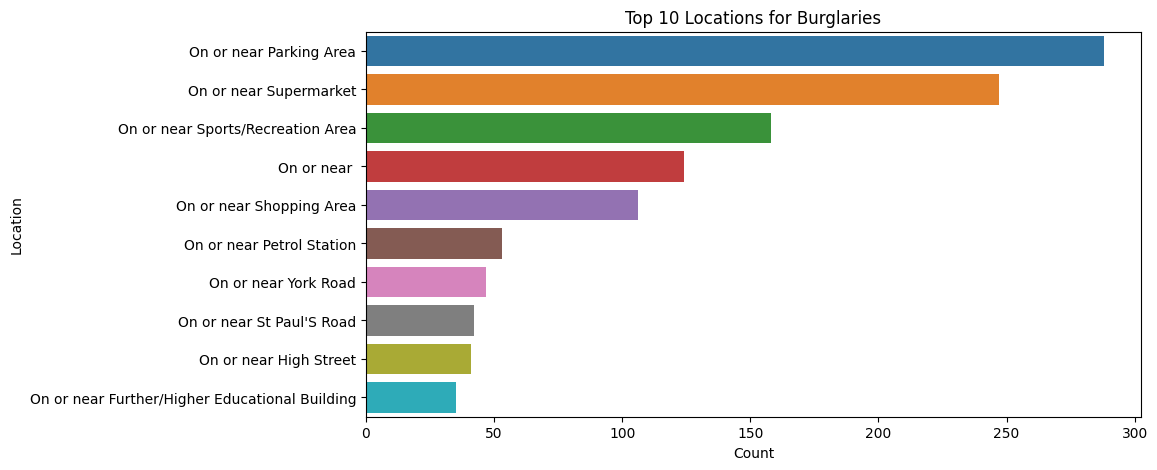

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by location and count the number of occurrences
location_counts = burglary_df.groupby("Location")["Location"].count()

# Sort the locations by count in descending order and get the top 10 locations
top_locations = location_counts.sort_values(ascending=False)[:10]

# Create a bar chart of the top 10 locations
plt.figure(figsize=(10, 5))
sns.barplot(y=top_locations.index, x=top_locations.values)
plt.title("Top 10 Locations for Burglaries")
plt.ylabel("Location")
plt.xlabel("Count")
plt.show()

In [12]:
# remove "on or near"
burglary_df = burglary_df[burglary_df["Location"] != "On or near "]
burglary_df["Location"].value_counts()

On or near Parking Area              288
On or near Supermarket               247
On or near Sports/Recreation Area    158
On or near Shopping Area             106
On or near Petrol Station             53
                                    ... 
On or near Burdon Close                1
On or near Helmsley Grove              1
On or near Honister Close              1
On or near Loweswater Crescent         1
On or near Arbia Court                 1
Name: Location, Length: 3852, dtype: int64

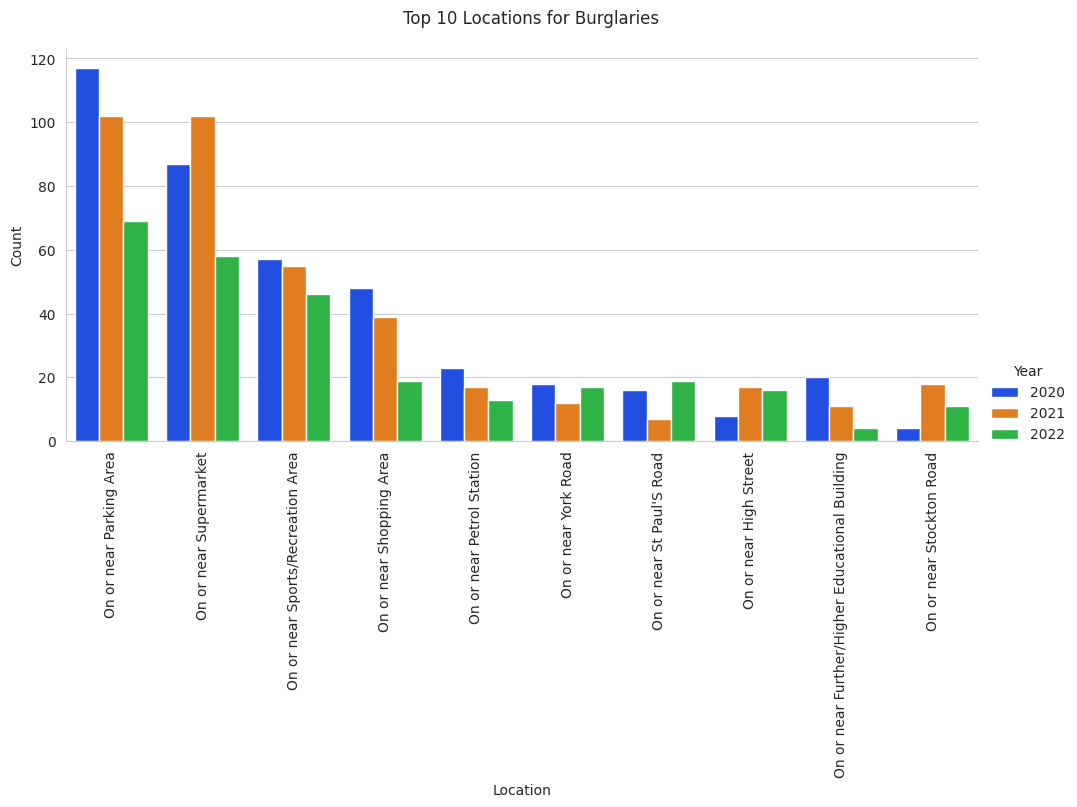

In [13]:
import seaborn as sns

# Create a countplot of the occurrences for each location and year combination
sns.set_style("whitegrid")
sns.set_palette("bright")
g = sns.catplot(data=burglary_df, x="Location", hue="Year", kind="count", order=burglary_df["Location"].value_counts().index[:10], hue_order=burglary_df["Year"].unique()[:3], height=5, aspect=2)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Location", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 Locations for Burglaries")

plt.show()


In [14]:
import seaborn as sns

def bg_crimes(year, crime_type):
    burglary_crimes = df[df["Crime type"] == crime_type].copy()
    burglary_crimes_year = burglary_crimes[burglary_crimes['Month'].str.contains(year)].copy()
    burglary_crimes_year['Month'] = burglary_crimes_year['Month'].str[5:]
    burglary_crimes_year['counts'] = burglary_crimes_year['Month'].map(burglary_crimes_year['Month'].value_counts())
    burglary_crimes_year = burglary_crimes_year.loc[:, ['Month', 'counts']]
    burglary_crimes_year.drop_duplicates(inplace=True)
    burglary_crimes_year.sort_values(by=['Month'], inplace=True)
    burglary_crimes_year['Month'] = pd.to_numeric(burglary_crimes_year['Month'])
    burglary_crimes_year['counts'] = pd.to_numeric(burglary_crimes_year['counts'])

    # Use seaborn barplot to create the plot with color
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    sns.barplot(data=burglary_crimes_year, x='Month', y='counts')
    plt.xlabel("Month")
    plt.ylabel("Number of Burglaries")
    plt.title("Number of Burglaries per Month " + year)
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1000x500 with 0 Axes>

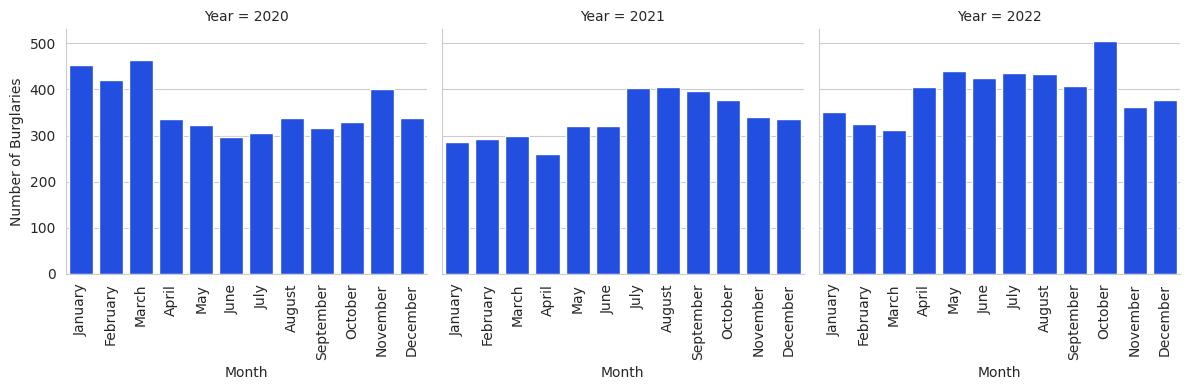

In [15]:
import calendar

# Create a list of month names in the correct order
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Filter the data to only include burglary crimes
burglary_crimes = burglary_df.copy()

plt.figure(figsize=(10, 5))
# Create a FacetGrid using seaborn
g = sns.FacetGrid(burglary_crimes, col='Year', margin_titles=True, height=4, aspect=1)

# Use the FacetGrid's map function to create a bar plot for each year
g.map(sns.countplot, 'Month')
g.set_axis_labels("Month", "Number of Burglaries")
g.fig.subplots_adjust(top=0.9)
g.set_xticklabels(labels=month_names, rotation=90)
# g.fig.suptitle("Number of Burglaries per Month (Burglary Crime Type)")
plt.tight_layout()
plt.savefig(plots_dir / "burglary_count_month.png")
plt.show()


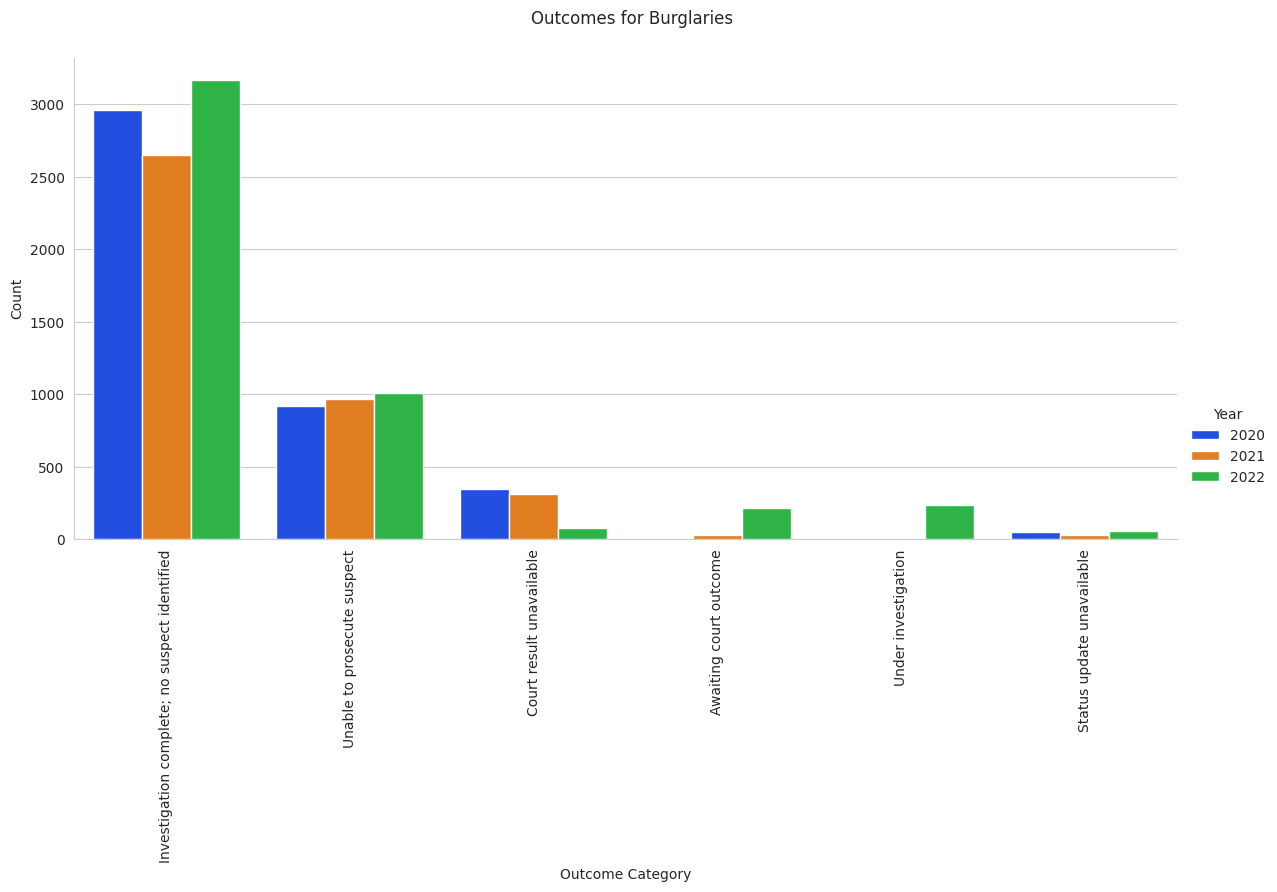

In [16]:

# Create a countplot of the occurrences for each location and year combination
sns.set_style("whitegrid")
sns.set_palette("bright")
g = sns.catplot(data=burglary_df, x="Last outcome category", hue="Year", kind="count", order=burglary_df["Last outcome category"].value_counts().index[:6], hue_order=burglary_df["Year"].unique()[:3], height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Outcome Category", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Outcomes for Burglaries")

plt.savefig(plots_dir / "burglary_outcomes.png")
plt.show()

In [17]:
map = folium.Map(location=[burglary_df['Latitude'].mean(), burglary_df['Longitude'].mean()], zoom_start=15, tiles='Stamen Terrain')
# create a list of latitudes and longitudes
lat_lng_list = list(zip(burglary_df['Latitude'], burglary_df['Longitude']))
# add the heat map layer to the map
heat_map = HeatMap(lat_lng_list)
map.add_child(heat_map)

In [18]:
map

In [19]:
import pandas as pd

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:


burglary_df.to_csv('/content/drive/My Drive/Project_Finale/cleaned_data.csv', index=False)


In [22]:
!ls '/content/drive/My Drive/project_finale'

ls: cannot access '/content/drive/My Drive/project_finale': No such file or directory
